In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
d1 =pd.read_csv('Group 1.csv')
print(d1.shape)
d1.head()

(7350, 12)


,Unnamed: 0,customer_id,gender,location,partner,dependents,senior,Tenure,monthly_cost,package,survey,Class
0,0,G1606,Female,Lancashire,0,1,0,20.0,NaN,2,0,Churn=No
1,1,F8889,Female,Essex,0,1,0,4.0,NaN,1,5,Churn=No
2,2,C5068,Female,Essex,0,Unknown,1,9.0,NaN,2,0,Churn=No
3,3,G9820,Male,West Yorkshire,1,1,1,9.0,NaN,4,9,Churn=No
4,4,H7261,Male,Greater Manchester,0,1,0,6.0,NaN,2,5,Churn=No


In [3]:
d1 = pd.read_csv('Group 1.csv', index_col=[0])
d1.isna().sum()

customer_id        0
gender             0
location           0
partner            0
dependents         0
senior             0
Tenure             0
monthly_cost    7271
package            0
survey             0
Class             59
dtype: int64

In [4]:
print(d1.dtypes)

customer_id      object
gender           object
location         object
partner           int64
dependents       object
senior            int64
Tenure          float64
monthly_cost     object
package           int64
survey           object
Class            object
dtype: object


In [5]:
package_s = {1:'26',2:'34',3:'40',4:'44'}
d1['monthly_cost'] = d1['package'].map(package_s)
d1['monthly_cost'] = d1['monthly_cost'].astype(float)
d1['total_cost'] = d1['monthly_cost']*d1['Tenure']


d1.drop(d1.index[d1['Tenure'] < 0], inplace=True)

print(d1.head(91))
d1.shape

   customer_id  gender            location  partner dependents  senior  \
0        G1606  Female          Lancashire        0          1       0   
1        F8889  Female               Essex        0          1       0   
2        C5068  Female               Essex        0    Unknown       1   
3        G9820    Male      West Yorkshire        1          1       1   
4        H7261    Male  Greater Manchester        0          1       0   
..         ...     ...                 ...      ...        ...     ...   
86       J9897    Male          Lancashire        1          1       0   
87       F5467  Female      Greater London        1          1       0   
88       D8098  Female      Greater London        0          1       0   
89       E5303    Male  Greater Manchester        0          0       0   
90       H2848    Male      Greater London        0          1       1   

    Tenure  monthly_cost  package survey      Class  total_cost  
0     20.0          34.0        2      0   Ch

(7224, 12)

In [6]:
#d1.drop(d1.index[d1['Tenure'] < 0], inplace=True)
#print(d1.head(100))
#d1.shape

In [7]:
#d1 = d1.dropna(axis=1)
#d1 = d1.dropna(axis=0)
#print(d1.Class.value_counts())
#df[‘Class’].value_counts().plot(‘bar’).set_title(‘Churn’)
#sns.countplot(x='Class',data=df,hue='gender',palette="coolwarm_r")(graph syntax)

In [8]:
d1["Class"] = d1["Class"].map({'Churn=No':0,'Churn=Yes':1})
d1["gender"] = d1["gender"].map({'Female':0,'Male':1})

d1['survey'] = d1['survey'].str.replace('No reply', '')
d1['dependents'] = d1['dependents'].str.replace('Unknown', '')

d1['survey']=np.where(d1['survey']>='5',1,0)
d1['survey'] = d1['survey'].astype(float)


print(d1.head(20))
d1.shape

   customer_id  gender            location  partner dependents  senior  \
0        G1606       0          Lancashire        0          1       0   
1        F8889       0               Essex        0          1       0   
2        C5068       0               Essex        0                  1   
3        G9820       1      West Yorkshire        1          1       1   
4        H7261       1  Greater Manchester        0          1       0   
5        K5319       1  Greater Manchester        1          0       0   
6        C4243       0       West Midlands        1          1       0   
7        J7639       0      Greater London        1          1       0   
8        I6974       0  Greater Manchester        1          1       0   
9        I3011       0          Merseyside        1          1       0   
10       D3337       0       Hertfordshire        1          1       0   
11       G7931       1      Greater London        0                  0   
12       C3676       1               D

(7224, 12)

In [9]:
d1= d1.dropna(subset=['Class'])
print(d1.head(20))
d1.shape


   customer_id  gender            location  partner dependents  senior  \
0        G1606       0          Lancashire        0          1       0   
1        F8889       0               Essex        0          1       0   
2        C5068       0               Essex        0                  1   
3        G9820       1      West Yorkshire        1          1       1   
4        H7261       1  Greater Manchester        0          1       0   
5        K5319       1  Greater Manchester        1          0       0   
6        C4243       0       West Midlands        1          1       0   
7        J7639       0      Greater London        1          1       0   
8        I6974       0  Greater Manchester        1          1       0   
9        I3011       0          Merseyside        1          1       0   
10       D3337       0       Hertfordshire        1          1       0   
11       G7931       1      Greater London        0                  0   
12       C3676       1               D

(7148, 12)

In [10]:
d1.isna().sum()

customer_id     0
gender          0
location        0
partner         0
dependents      0
senior          0
Tenure          0
monthly_cost    0
package         0
survey          0
Class           0
total_cost      0
dtype: int64

In [11]:
print(d1.dtypes)

customer_id      object
gender            int64
location         object
partner           int64
dependents       object
senior            int64
Tenure          float64
monthly_cost    float64
package           int64
survey          float64
Class           float64
total_cost      float64
dtype: object


In [12]:
d1=d1.reindex(columns= ['customer_id', 'location','package', 'dependents','gender','partner','senior', 'Tenure','monthly_cost', 'total_cost','survey', 'Class'])
print(d1.head(5))

  customer_id            location  package dependents  gender  partner  \
0       G1606          Lancashire        2          1       0        0   
1       F8889               Essex        1          1       0        0   
2       C5068               Essex        2                  0        0   
3       G9820      West Yorkshire        4          1       1        1   
4       H7261  Greater Manchester        2          1       1        0   

   senior  Tenure  monthly_cost  total_cost  survey  Class  
0       0    20.0          34.0       680.0     0.0    0.0  
1       0     4.0          26.0       104.0     1.0    0.0  
2       1     9.0          34.0       306.0     0.0    0.0  
3       1     9.0          44.0       396.0     1.0    0.0  
4       0     6.0          34.0       204.0     1.0    0.0  


In [13]:
d1_num = d1[['gender','partner','senior', 'Tenure','monthly_cost', 'total_cost','survey', 'Class']]
d1_cat = d1[['customer_id', 'location','package', 'dependents']]
d1_num.head(5)

,gender,partner,senior,Tenure,monthly_cost,total_cost,survey,Class
0,0,0,0,20.0,34.0,680.0,0.0,0.0
1,0,0,0,4.0,26.0,104.0,1.0,0.0
2,0,0,1,9.0,34.0,306.0,0.0,0.0
3,1,1,1,9.0,44.0,396.0,1.0,0.0
4,1,0,0,6.0,34.0,204.0,1.0,0.0


In [14]:
print(d1_num.describe())

            gender      partner       senior       Tenure  monthly_cost  \
count  7148.000000  7148.000000  7148.000000  7148.000000   7148.000000   
mean      0.497062     0.547985     0.167879     8.867375     35.142138   
std       0.500026     0.497727     0.373785     6.178270      7.034302   
min       0.000000     0.000000     0.000000     0.000000     26.000000   
25%       0.000000     0.000000     0.000000     3.000000     26.000000   
50%       0.000000     1.000000     0.000000     9.000000     34.000000   
75%       1.000000     1.000000     0.000000    13.000000     44.000000   
max       1.000000     1.000000     1.000000    30.000000     44.000000   

        total_cost       survey        Class  
count  7148.000000  7148.000000  7148.000000  
mean    317.121992     0.521964     0.287493  
std     235.855935     0.499552     0.452625  
min       0.000000     0.000000     0.000000  
25%     104.000000     0.000000     0.000000  
50%     306.000000     1.000000     0.0000

In [15]:
print(d1_cat.describe(exclude=['int64','float64']))

       customer_id        location dependents
count         7148            7148       7148
unique        6578              17          3
top          H6997  Greater London          1
freq             4            2280       3428


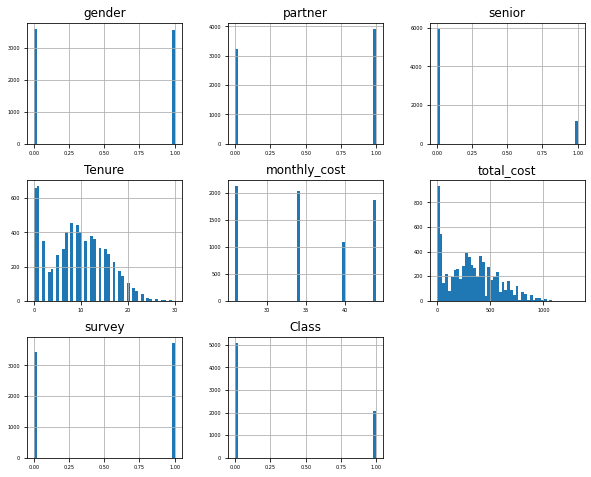

In [16]:
d1_num.hist(figsize=(10, 8), bins=50, xlabelsize=5, ylabelsize=5);

Text(0, 0.5, 'count')

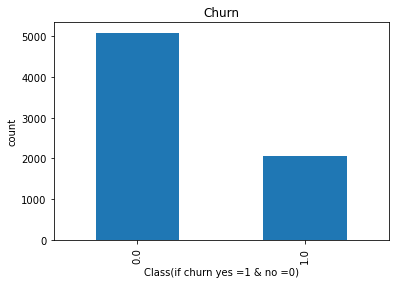

In [17]:
d1['Class'].value_counts().plot(kind = 'bar').set_title('Churn')
plt.xlabel('Class(if churn yes =1 & no =0)')
plt.ylabel('count')

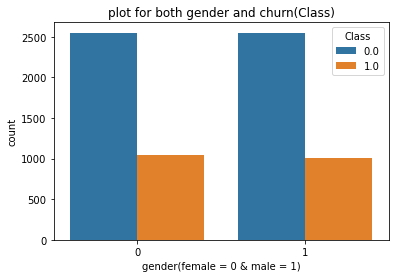

In [18]:
sns.countplot(x='gender',hue='Class',data=d1)
plt.xlabel('gender(female = 0 & male = 1)')
plt.ylabel('count')
plt.title('plot for both gender and churn(Class)')
plt.show()

Text(0.5, 0, 'plot for churn based on package')

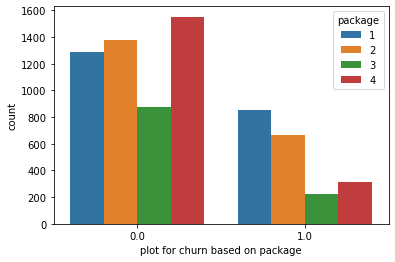

In [19]:
sns.countplot(x='Class',data=d1, hue='package')
plt.xlabel('plot for churn based on package')

[Text(0.5, 0, 'Tenure(No.of years customer stayed)'), Text(0, 0.5, 'count')]

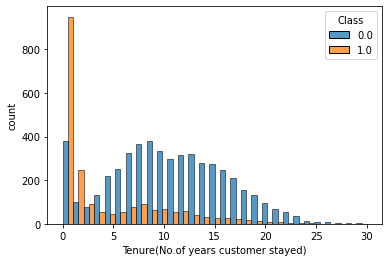

In [20]:
tenure_plot = sns.histplot(x = 'Tenure', hue = 'Class', data = d1, multiple='dodge')
tenure_plot.set(xlabel="Tenure(No.of years customer stayed)", ylabel = "count")

[Text(0.5, 0, 'total_cost'), Text(0, 0.5, 'count')]

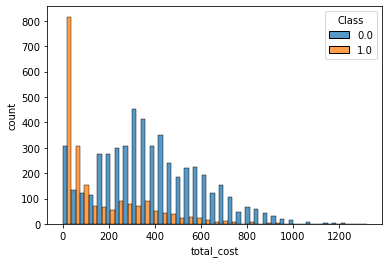

In [21]:
tenure_plot = sns.histplot(x = 'total_cost', hue = 'Class', data = d1, multiple='dodge')
tenure_plot.set(xlabel="total_cost", ylabel = "count")

<AxesSubplot:xlabel='monthly_cost', ylabel='Count'>

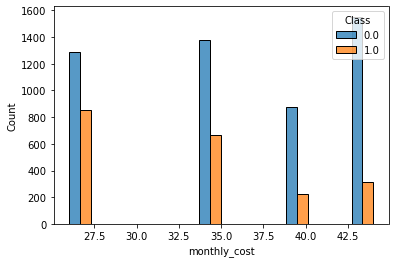

In [22]:
sns.histplot(x='monthly_cost',hue='Class',data=d1,multiple='dodge')
#plt.xticks(range(20,50,5))

<AxesSubplot:>

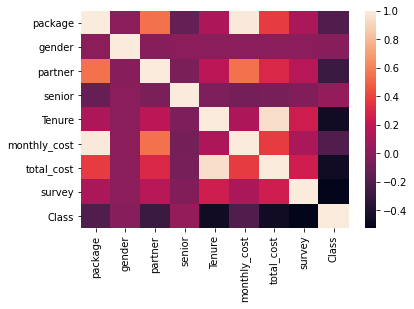

In [23]:
import seaborn as sns
corr = d1.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
#corr = data.corr()
# Plotting the heatmap of correlation between features
#plt.figure(figsize=(20,20))
#sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

In [24]:
from sklearn.preprocessing import StandardScaler
X = d1.iloc[:,5:11]
Y = d1.iloc[:,-1]
#X = StandardScaler(X)
print(X.head(5))
#print(Y.head(5))

   partner  senior  Tenure  monthly_cost  total_cost  survey
0        0       0    20.0          34.0       680.0     0.0
1        0       0     4.0          26.0       104.0     1.0
2        0       1     9.0          34.0       306.0     0.0
3        1       1     9.0          44.0       396.0     1.0
4        0       0     6.0          34.0       204.0     1.0


In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print(x_train.shape)

(5718, 6)


In [26]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
x_train_norm = mms.fit_transform(x_train)
x_test_norm = mms.transform(x_test)

In [27]:
#from sklearn.preprocessing import StandardScaler
#stdsc = StandardScaler()
#X_train_std = stdsc.fit_transform(x_train)
#X_test_std = stdsc.transform(x_test)
#print(x_train.head(5))

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import metrics
Regressor= LogisticRegression(random_state = 50)
Regressor.fit(x_train_norm,y_train)
loc_pred = Regressor.predict(x_test_norm)
loc_accuracy = round(metrics.accuracy_score(y_test, loc_pred)*100,2)

In [29]:
#pred_y = Regressor.predict(x_train)

In [30]:
#from sklearn.metrics import r2_score
#r2_score(y_train,pred_y)

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [40]:
knn_model = KNeighborsClassifier(n_neighbors = 5,metric ='minkowski', p=2)
knn_model.fit(x_train_norm,y_train)
knn_pred = knn_model.predict(x_test_norm)
knn_accuracy = round(metrics.accuracy_score(y_test, knn_pred)*100,2)

In [41]:
decisiontree_model = DecisionTreeClassifier(criterion = 'gini', random_state = 50)
decisiontree_model.fit(x_train_norm,y_train)
decisiontree_model_pred = decisiontree_model.predict(x_test_norm)
decisiontree_model_accuracy = round(metrics.accuracy_score(y_test, decisiontree_model_pred)*100,2)


In [42]:
rf_model = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
rf_model.fit(x_train_norm,y_train)
rf_model_pred = rf_model.predict(x_test_norm)
rf_mode_accuracy = round(metrics.accuracy_score(y_test, rf_model_pred)*100,2)


In [43]:
model_comparison = pd.DataFrame({'Model': ['Logistic Regression','K-Nearest Neighbor','Decision Tree','Random Forest'],'Score':[loc_accuracy,knn_accuracy,decisiontree_model_accuracy,rf_mode_accuracy]})
model_comparison_d1 = model_comparison.sort_values(by = 'Score', ascending = False)
model_comparison_d1 = model_comparison_d1.set_index('Score')
model_comparison_d1.reset_index()

,Score,Model
0,85.73,Random Forest
1,85.24,Decision Tree
2,84.90,K-Nearest Neighbor
3,84.69,Logistic Regression


In [45]:
from sklearn.metrics import confusion_matrix
confus_rf = confusion_matrix(y_test,rf_model_pred)
confus_rf

array([[929,  89],
       [115, 297]], dtype=int64)